## Project: Time Series Analysis on temperature 2021-2022

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")


# Import the relevant sklearn packages
from statsmodels.api import OLS, add_constant
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['font.size'] = '14'

In [15]:
df= pd.read_csv('TG_STAID002759.csv',sep=',',skiprows=19, parse_dates=True, index_col=1, skipinitialspace=True)
df

,SOUID,TG,Q_TG
DATE,,,
1876-01-01,127488,22,0
1876-01-02,127488,25,0
1876-01-03,127488,3,0
1876-01-04,127488,-58,0
1876-01-05,127488,-98,0
...,...,...,...
2022-12-27,111448,42,0
2022-12-28,111448,63,0
2022-12-29,111448,100,0


In [16]:
df = df.drop(['SOUID', 'Q_TG'], axis=1)

In [17]:
df = df.rename(columns={'TG': 'mean_temp'})

In [18]:
df.loc[:] *=0.1

In [19]:
df

,mean_temp
DATE,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2022-12-27,4.2
2022-12-28,6.3
2022-12-29,10.0


In [20]:
# select rows within the date range '2021-01-01' to '2022-12-31'
start_date = '2021-01-01'
end_date = '2022-12-31'
df = df.loc[start_date:end_date]

In [21]:
df

,mean_temp
DATE,
2021-01-01,2.1
2021-01-02,1.1
2021-01-03,0.6
2021-01-04,0.8
2021-01-05,1.7
...,...
2022-12-27,4.2
2022-12-28,6.3
2022-12-29,10.0


### Train-Validation split

In [22]:
df_train = df[:-365]

df_test = df[-365:]

### EDA

In [23]:
def plot_meantemp(df, title='Daily mean temperature since 2021', ylim=True):
    df.plot()
    plt.title(title)
    plt.ylabel('# of mean temperature in C')
    if ylim:
        plt.ylim(ymin=0)
    plt.show()

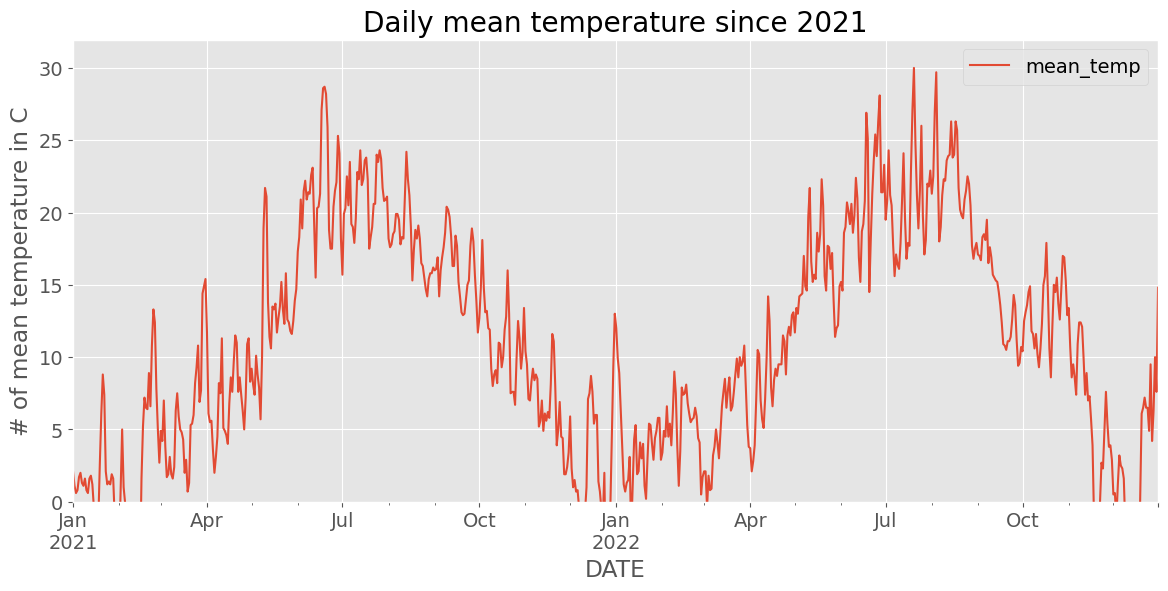

In [24]:
plot_meantemp(df)

### Model the trend

In [25]:
# Create a monthly column for the trend
df['day'] = df.index.day
df.head()

C:\Users\helge\AppData\Local\Temp\ipykernel_26640\1140390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df.index.day


,mean_temp,day
DATE,,
2021-01-01,2.1,1
2021-01-02,1.1,2
2021-01-03,0.6,3
2021-01-04,0.8,4
2021-01-05,1.7,5


In [26]:
# Create a timestep variable
df['timestep'] = list(range(len(df)))
df.head()

C:\Users\helge\AppData\Local\Temp\ipykernel_26640\2799109993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestep'] = list(range(len(df)))


,mean_temp,day,timestep
DATE,,,
2021-01-01,2.1,1,0
2021-01-02,1.1,2,1
2021-01-03,0.6,3,2
2021-01-04,0.8,4,3
2021-01-05,1.7,5,4


In [27]:
# Run a Linear Regression
m = LinearRegression()
X = df[['timestep']]
y = df.mean_temp
m.fit(X, y)

LinearRegression()

### Plot the trend and the original data

In [28]:
# Use the model to make a prediction
df['trend'] = m.predict(X)
df.head(15)

C:\Users\helge\AppData\Local\Temp\ipykernel_26640\1992350723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trend'] = m.predict(X)


,mean_temp,day,timestep,trend
DATE,,,,
2021-01-01,2.1,1,0,8.988558
2021-01-02,1.1,2,1,8.994183
2021-01-03,0.6,3,2,8.999809
2021-01-04,0.8,4,3,9.005434
2021-01-05,1.7,5,4,9.011060
2021-01-06,2.0,6,5,9.016685
2021-01-07,1.3,7,6,9.022311
2021-01-08,1.1,8,7,9.027936
2021-01-09,1.6,9,8,9.033562


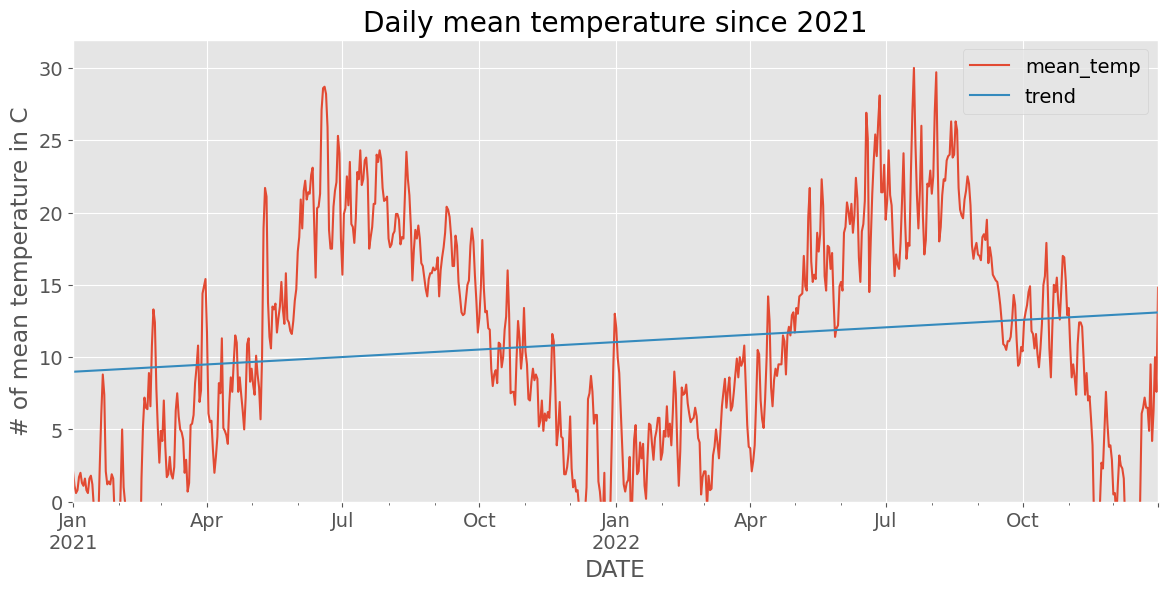

In [29]:
plot_meantemp(df[['mean_temp', 'trend']])

In [30]:
import plotly.express as px
px.scatter(df[['mean_temp','trend']])

In [31]:
m.intercept_,m.coef_

(8.988557989618277, array([0.00562547]))

### Model the seasonality

In [32]:
pd.get_dummies(df.day,prefix='day')

,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
DATE,,,,,,,,,,,,,,,,,,,,,
2021-01-01,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-02,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-03,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-04,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-01-05,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2022-12-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2022-12-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
# One-Hot-Encoding the month
seasonal_dummies = pd.get_dummies(df.day,prefix='day')
# sklearn.preprocessing.OneHotEncoder

df = df.join(seasonal_dummies)

In [34]:
# Define X and y
X = df.drop(columns=['mean_temp', 'day', 'trend'])

In [35]:
m.fit(X, y)

LinearRegression()

In [36]:
# Create a model with trend and seasonality
df['trend_seasonal'] = m.predict(X)
df.head()

,mean_temp,day,timestep,trend,day_1,day_2,day_3,day_4,day_5,day_6,...,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,trend_seasonal
DATE,,,,,,,,,,,,,,,,,,,,,
2021-01-01,2.1,1,0,8.988558,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.532512
2021-01-02,1.1,2,1,8.994183,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.490845
2021-01-03,0.6,3,2,8.999809,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9.049179
2021-01-04,0.8,4,3,9.005434,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9.074179
2021-01-05,1.7,5,4,9.011060,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,8.657512


### Plot the original data and the trend

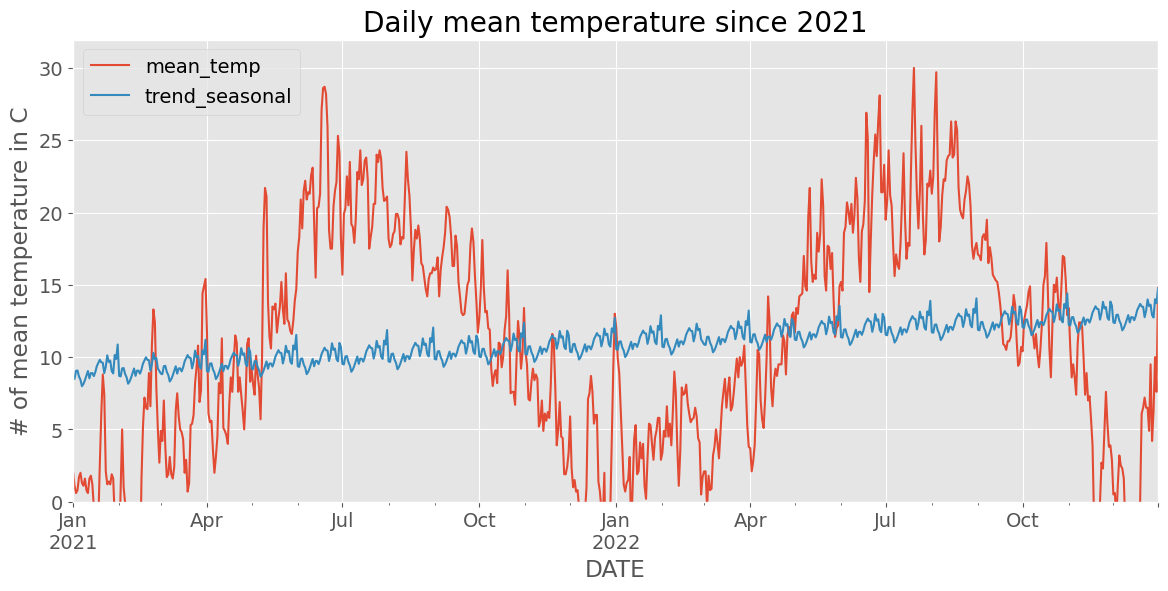

In [37]:
plot_meantemp(df[['mean_temp', 'trend_seasonal']])

### Extract the remainder

In [38]:
# We want to extract the part of the model that the trend_seasonal is not able to explain
df['remainder'] = df.mean_temp - df.trend_seasonal

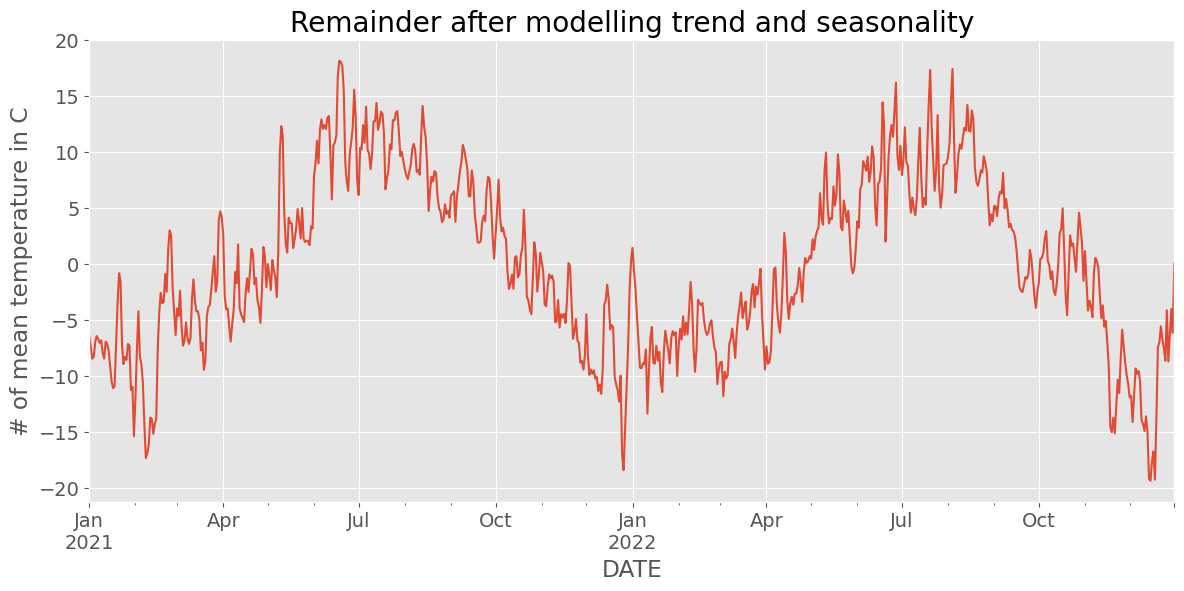

In [39]:
plot_meantemp(df['remainder'], title='Remainder after modelling trend and seasonality', ylim=False)

In [40]:
df['remainder'].mean(), df.remainder.std()

(-4.002886302484126e-16, 7.690087475896581)

In [41]:
random_array = np.random.normal(loc=0, scale=10, size=730)
df['random'] = random_array

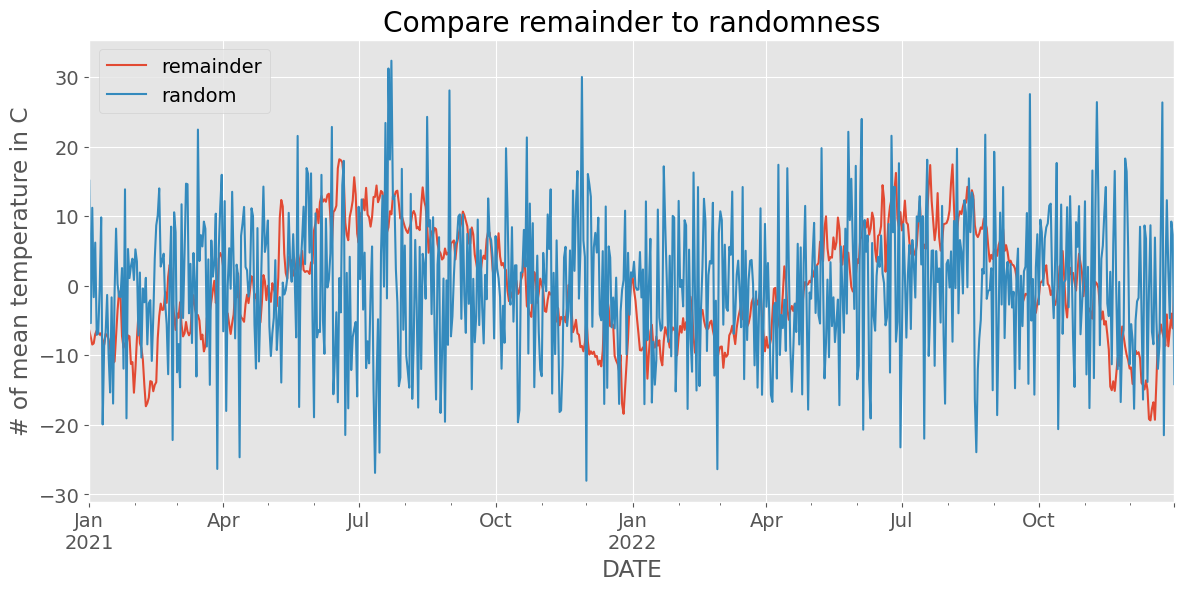

In [42]:
plot_meantemp(df[['remainder', 'random']], title='Compare remainder to randomness', ylim=False)

In [43]:
df['remainder'].to_csv('temperature_remainder_2021_days.csv')

In [44]:
df_rem = pd.read_csv('temperature_remainder_2021_days.csv', index_col=0, parse_dates=True)
df_rem.head()

,remainder
DATE,
2021-01-01,-6.432512
2021-01-02,-7.390845
2021-01-03,-8.449179
2021-01-04,-8.274179
2021-01-05,-6.957512


In [45]:
# Plot the data
def plot_remainder(df_rem, title='Remaining Temperature after Extracting Trend and Seasonality'):
    df_rem.plot()
    plt.title(title)
    plt.ylabel('# of mean temperature in C')
    plt.show()

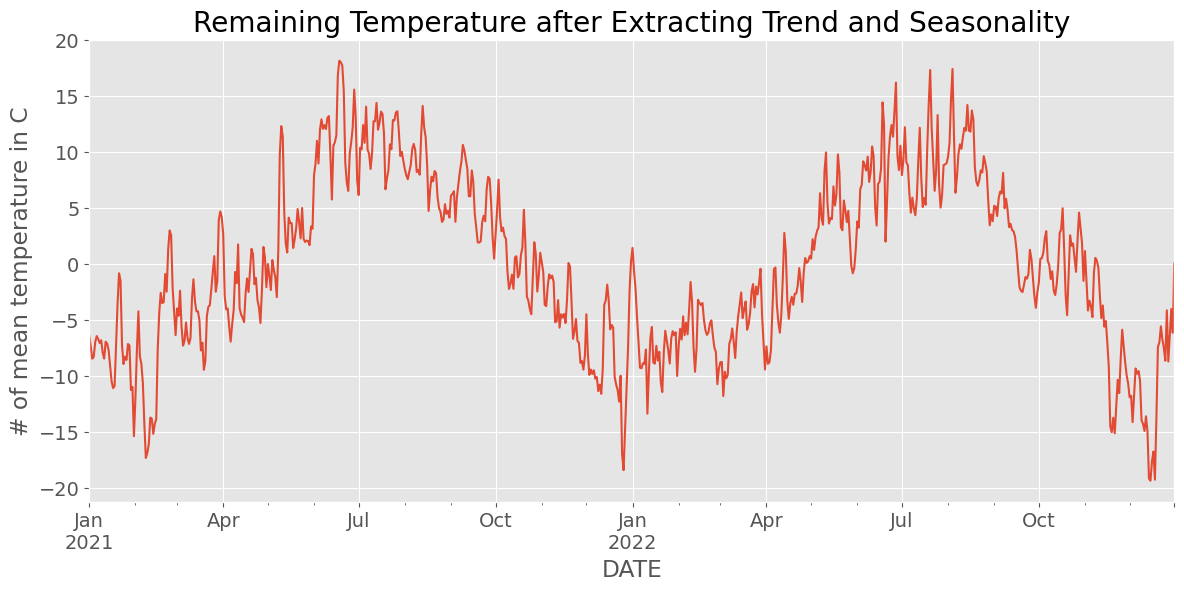

In [46]:
plot_remainder(df_rem['remainder'])

### Create a time-lagged input feature: lag1

In [47]:
df_rem

,remainder
DATE,
2021-01-01,-6.432512
2021-01-02,-7.390845
2021-01-03,-8.449179
2021-01-04,-8.274179
2021-01-05,-6.957512
...,...
2022-12-27,-8.702185
2022-12-28,-6.439685
2022-12-29,-4.008307


In [48]:
df_rem['lag1'] = df_rem['remainder'].shift(1)

df_rem

,remainder,lag1
DATE,,
2021-01-01,-6.432512,NaN
2021-01-02,-7.390845,-6.432512
2021-01-03,-8.449179,-7.390845
2021-01-04,-8.274179,-8.449179
2021-01-05,-6.957512,-8.274179
...,...,...
2022-12-27,-8.702185,-4.127185
2022-12-28,-6.439685,-8.702185
2022-12-29,-4.008307,-6.439685


In [49]:
df_rem.corr()

,remainder,lag1
remainder,1.000000,0.957265
lag1,0.957265,1.000000


### Plot remainder against lag1

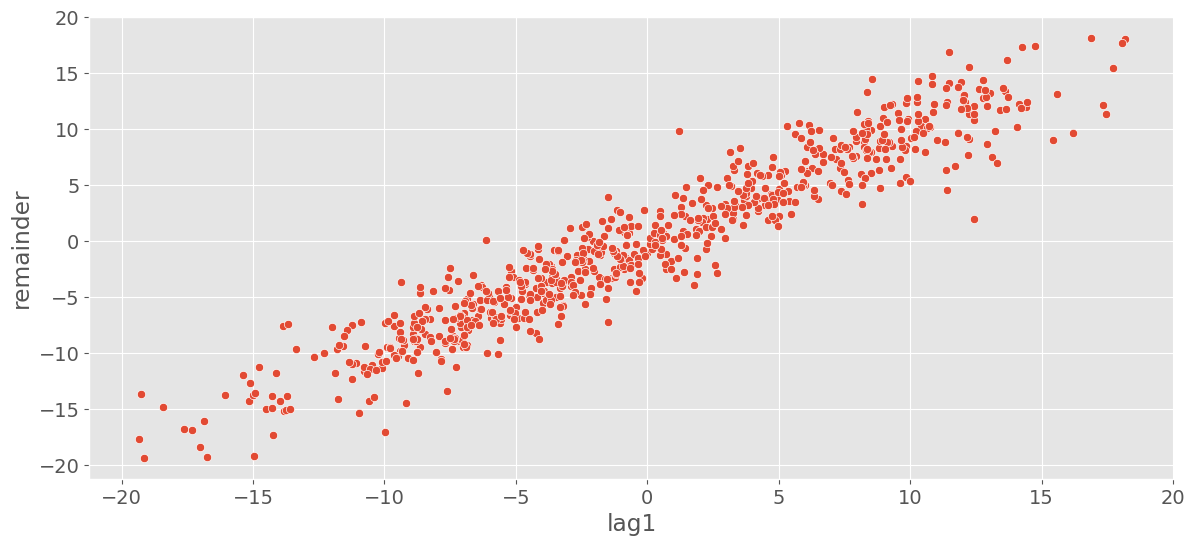

In [50]:
sns.scatterplot(x='lag1', y='remainder', data=df_rem);

### Run an Autoregression (Linear Regression) of lag1 on the remainder

In [51]:
# Drop missing values
df_rem.dropna(inplace=True)
df_rem.head()

,remainder,lag1
DATE,,
2021-01-02,-7.390845,-6.432512
2021-01-03,-8.449179,-7.390845
2021-01-04,-8.274179,-8.449179
2021-01-05,-6.957512,-8.274179
2021-01-06,-6.432512,-6.957512


In [52]:
# Assign X and y
X = df_rem[['lag1']]
y = df_rem['remainder']

In [53]:
# Create and fit the model
m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [54]:
# Create predictions
df_rem['predictions_ar1'] = m.predict(X)
df_rem.head()

,remainder,lag1,predictions_ar1
DATE,,,
2021-01-02,-7.390845,-6.432512,-6.145755
2021-01-03,-8.449179,-7.390845,-7.062693
2021-01-04,-8.274179,-8.449179,-8.075312
2021-01-05,-6.957512,-8.274179,-7.907871
2021-01-06,-6.432512,-6.957512,-6.648078


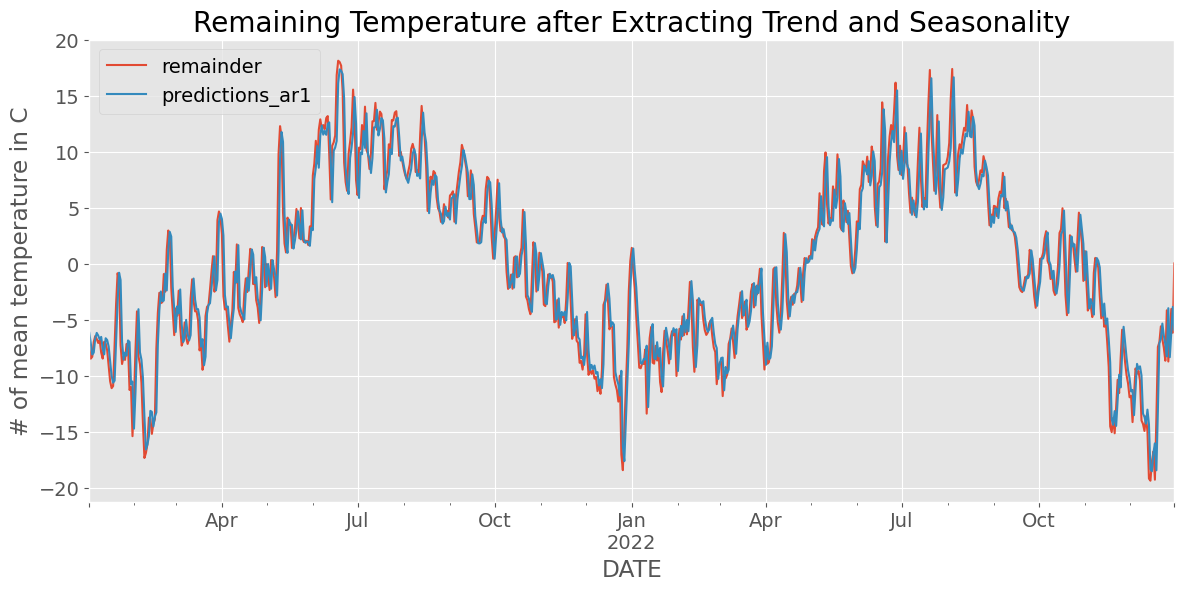

In [55]:
# Plot the original remainder and the prediction
plot_remainder(df_rem[['remainder', 'predictions_ar1']])

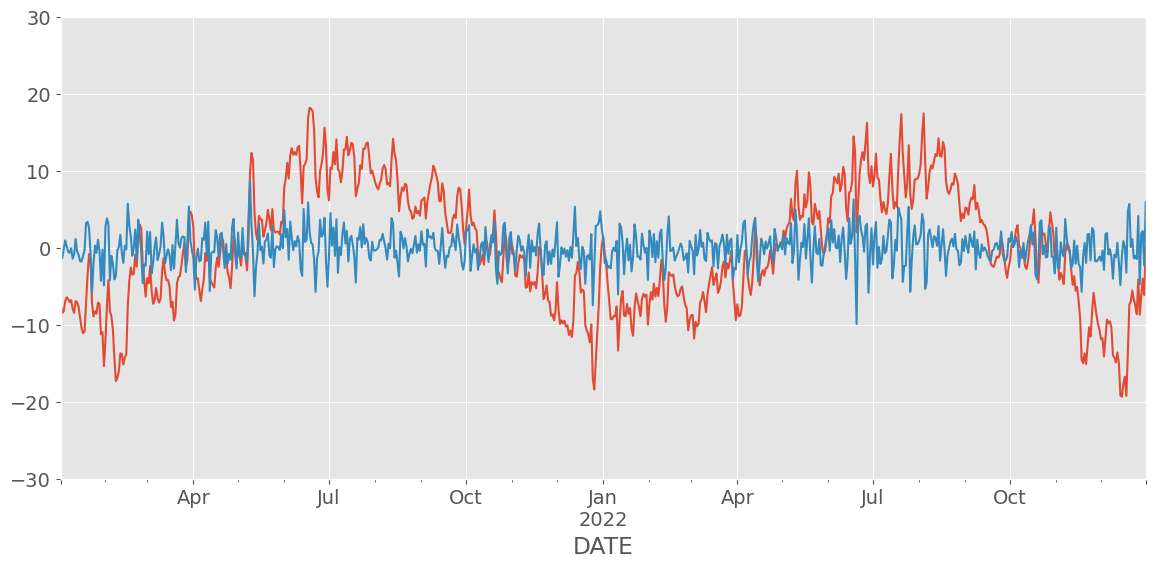

In [56]:
# Is the remainder prediction error smaller than the remainder itself?
df_rem['remainder'].plot(ylim=[-30,30])
(df_rem['remainder'] - df_rem['predictions_ar1']).plot(ylim=[-30,30]);

### Should we add another lag (lag2)?

In [57]:
df_rem['lag2'] = df_rem['remainder'].shift(2)
df_rem['lag3'] = df_rem['remainder'].shift(3)

df_rem.head()

,remainder,lag1,predictions_ar1,lag2,lag3
DATE,,,,,
2021-01-02,-7.390845,-6.432512,-6.145755,NaN,NaN
2021-01-03,-8.449179,-7.390845,-7.062693,NaN,NaN
2021-01-04,-8.274179,-8.449179,-8.075312,-7.390845,NaN
2021-01-05,-6.957512,-8.274179,-7.907871,-8.449179,-7.390845
2021-01-06,-6.432512,-6.957512,-6.648078,-8.274179,-8.449179


In [58]:
round(df_rem[['remainder', 'lag1', 'lag2','lag3']].corr(), 2)

,remainder,lag1,lag2,lag3
remainder,1.00,0.96,0.90,0.87
lag1,0.96,1.00,0.96,0.91
lag2,0.90,0.96,1.00,0.96
lag3,0.87,0.91,0.96,1.00


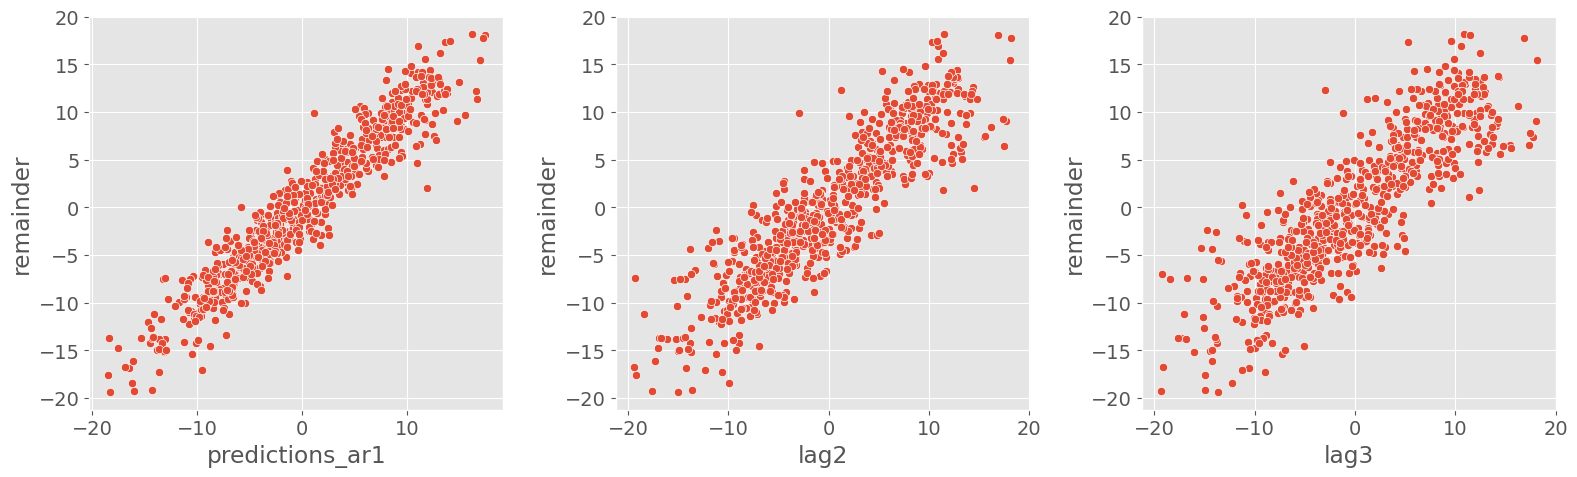

In [59]:
import matplotlib.gridspec as gridspec
#sns.set() # set seaborn as default style
p=3
lag_columns = df_rem.columns[-p:]
fig, axes = plt.subplots(1,p, figsize=(16,5),dpi=100)
gs = gridspec.GridSpec(1,p)

for i in range(p):
    sns.scatterplot(x=df_rem[lag_columns[i]],y=df_rem['remainder'],ax=axes[i])
    
plt.tight_layout()

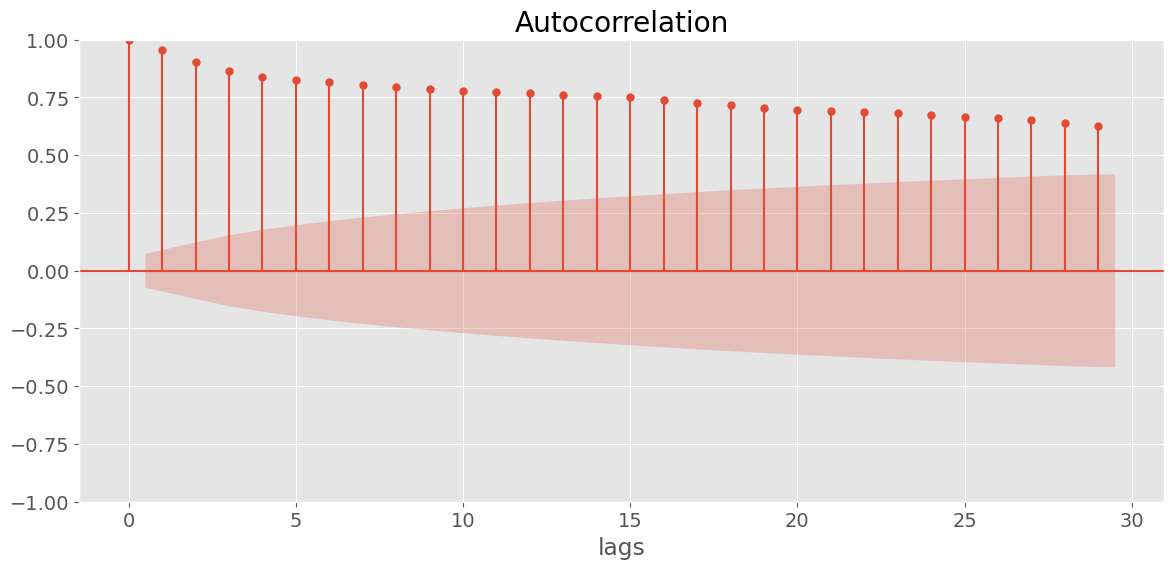

In [60]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_rem['remainder'])
plt.xlabel('lags');

In [61]:
# white noise or random noise
import numpy as np
random_array = np.random.normal(loc=0, scale=10, size=729)
df_rem['random'] = random_array

<AxesSubplot: xlabel='DATE'>

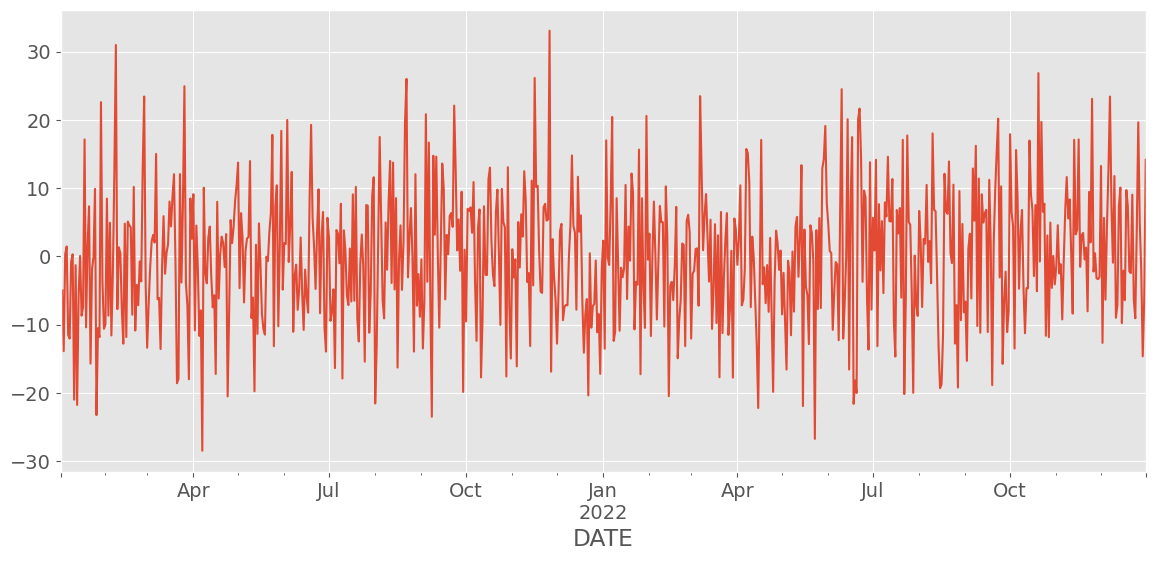

In [62]:
df_rem['random'].plot()

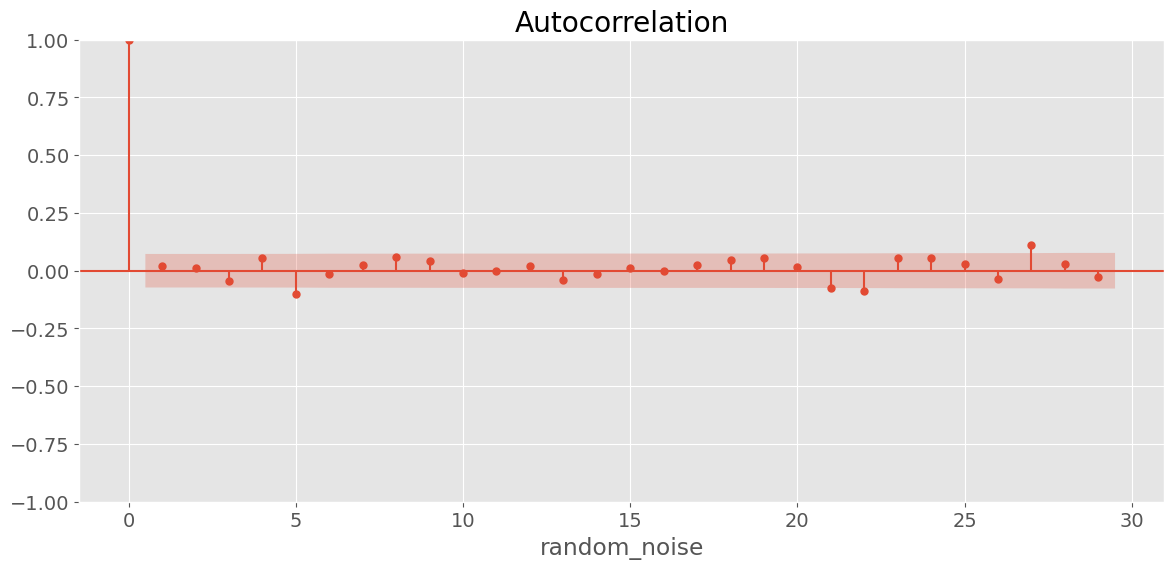

In [63]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_rem['random'])
plt.xlabel('random_noise');

### Determine _Partial_ Autocorrelation

c:\Users\helge\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



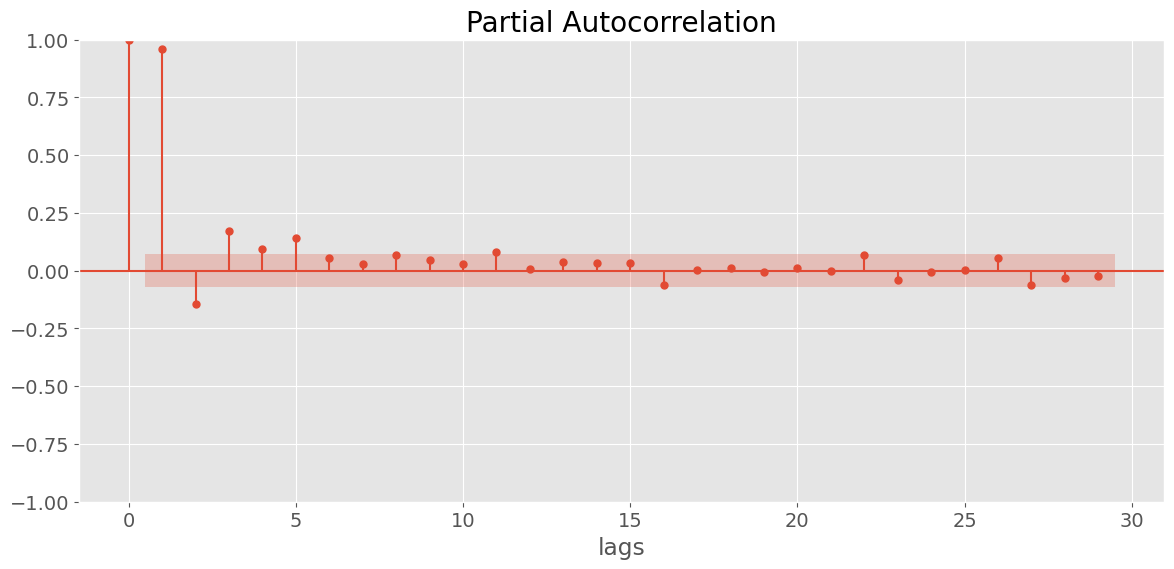

In [64]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_rem['remainder'])
plt.xlabel('lags');

In [65]:
from statsmodels.tsa.ar_model import ar_select_order
lags_order = ar_select_order(df_rem['remainder'], maxlag=5)

c:\Users\helge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\helge\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [66]:
lags_order.ar_lags

[1, 2, 3, 4, 5]

In [67]:
lags_order.bic

{(1, 2, 3, 4, 5): 3198.9962621780473,
 (1, 2, 3): 3206.339656097598,
 (1, 2, 3, 4): 3207.1143263145823,
 (1, 2): 3220.658380519841,
 (1,): 3228.62238767553,
 0: 5014.477818223291}

### OLS Regression

#### on Xtrain_tran

In [ ]:
# Create a list of features
forward_features = []

# Original features
feature_list = Xtrain_tran.columns

In [ ]:
feature_list

In [ ]:
possible_models = pd.DataFrame(columns=['features', 'p', 'r2'])
# Run a linear regression separately on each of the features

In [ ]:
while len(feature_list) > 0:
    forward_selection = pd.DataFrame(columns=['features', 'p', 'r2'])
    for feature in feature_list:
        m_feature = OLS(ytrain, Xtrain_tran[forward_features + [feature]])
#         print(forward_features + [feature])
        result = m_feature.fit()
#         print(result.summary())
        forward_selection = forward_selection.append({
                                    'feature': feature
                                  , 'features': forward_features + [feature]
                                  , 'p': result.pvalues.loc[feature]
                                  , 'r2': result.rsquared}
                                  , ignore_index=True)

    # p > 0.05 -> not significant
    # p <= 0.05 significant
    # p <= 0.01 very significant
    # p <= 0.001 highly significant

    if forward_selection.sort_values('p').iloc[0].p < 0.05:
        print(forward_selection.sort_values('p').iloc[0].features)
        best_feature = forward_selection.sort_values('p').iloc[0].feature
        forward_features.append(best_feature)
        feature_list = feature_list.drop(best_feature)
        best_model = forward_selection[forward_selection['feature']==best_feature]
        possible_models = possible_models.append(best_model, ignore_index=True)

    else:
        break

In [ ]:
result.summary()